# **Initial Exploration**

## Objectives

* Write here your notebook objective, for example, "Fetch data from Kaggle and save as raw data", or "engineer features for modelling"

## Inputs

* Write here which data or information you need to run the notebook 

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* In case you have any additional comments that don't fit in the previous bullets, please state them here. 


---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/Users/edsmacbook/Library/CloudStorage/OneDrive-Personal/code_institute/project-5/parkrun-explore/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/Users/edsmacbook/Library/CloudStorage/OneDrive-Personal/code_institute/project-5/parkrun-explore'

# Section 1

Section 1 content

In [4]:
import pandas as pd
df = pd.read_csv(f"inputs/datasets/raw/airruns.csv",index_col=0)
df.head()

,name,time,parkrun,race_num,date,year,is_male,med_age,location,co,no,no2,o3,so2,pm2_5,pm10,nh3,county,lat,lon
0,James BAKER,17.183333,hogmoorinclosure,180,2022-12-31,2022,1,47.0,Whitehill,193.6,0.0,4.16,67.23,2.0,3.56,4.59,0.06,Hampshire,51.097719,-0.864067
1,Jon FAIRS,19.483333,hogmoorinclosure,180,2022-12-31,2022,1,47.0,Whitehill,193.6,0.0,4.16,67.23,2.0,3.56,4.59,0.06,Hampshire,51.097719,-0.864067
2,Aaron HICKEY,20.750000,hogmoorinclosure,180,2022-12-31,2022,1,18.5,Whitehill,193.6,0.0,4.16,67.23,2.0,3.56,4.59,0.06,Hampshire,51.097719,-0.864067
3,Oliver BARLOW,21.233333,hogmoorinclosure,180,2022-12-31,2022,1,37.0,Whitehill,193.6,0.0,4.16,67.23,2.0,3.56,4.59,0.06,Hampshire,51.097719,-0.864067
4,Catherine SEAGER,21.600000,hogmoorinclosure,180,2022-12-31,2022,0,42.0,Whitehill,193.6,0.0,4.16,67.23,2.0,3.56,4.59,0.06,Hampshire,51.097719,-0.864067


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4351832 entries, 0 to 4351831
Data columns (total 20 columns):
 #   Column    Dtype  
---  ------    -----  
 0   name      object 
 1   time      float64
 2   parkrun   object 
 3   race_num  int64  
 4   date      object 
 5   year      int64  
 6   is_male   int64  
 7   med_age   float64
 8   location  object 
 9   co        float64
 10  no        float64
 11  no2       float64
 12  o3        float64
 13  so2       float64
 14  pm2_5     float64
 15  pm10      float64
 16  nh3       float64
 17  county    object 
 18  lat       float64
 19  lon       float64
dtypes: float64(12), int64(3), object(5)
memory usage: 697.2+ MB


In [6]:
# Drop atmospheric data, name, location and county, race no
df = pd.read_csv(f"inputs/datasets/raw/airruns.csv",index_col=0).drop(['co','no','no2','o3','so2','pm2_5','pm10','nh3', 'name','race_num','location', 'county'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4351832 entries, 0 to 4351831
Data columns (total 8 columns):
 #   Column   Dtype  
---  ------   -----  
 0   time     float64
 1   parkrun  object 
 2   date     object 
 3   year     int64  
 4   is_male  int64  
 5   med_age  float64
 6   lat      float64
 7   lon      float64
dtypes: float64(4), int64(2), object(2)
memory usage: 298.8+ MB


In [ ]:
from ydata_profiling import ProfileReport
pandas_report = ProfileReport(df=df, title='Cheeky Explore', minimal=True)
pandas_report.to_notebook_iframe()

# Box Plot and Histogram

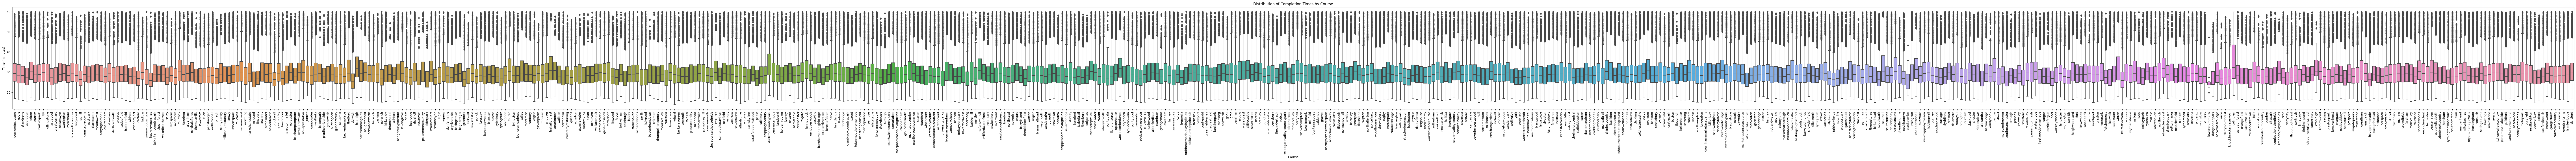

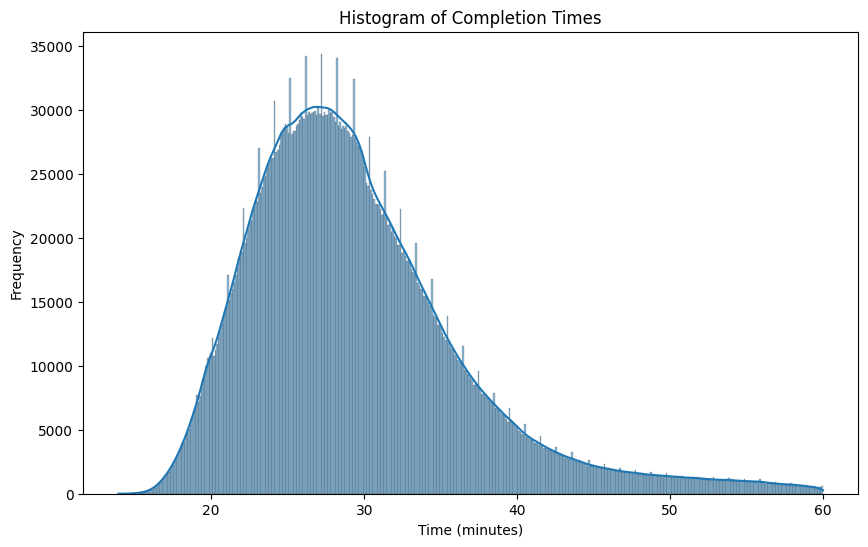

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting a box plot
plt.figure(figsize=(150, 6))
sns.boxplot(x='parkrun', y='time', data=df)
plt.title('Distribution of Completion Times by Course')
plt.xlabel('Course')
plt.ylabel('Time (minutes)')
plt.xticks(rotation=90)
plt.show()

# Plotting a histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='time', kde=True)
plt.title('Histogram of Completion Times')
plt.xlabel('Time (minutes)')
plt.ylabel('Frequency')
plt.show()


# Kurtosis

In [20]:
from scipy.stats import kurtosis

# Assuming you have a DataFrame called 'df' with columns 'Course' and 'Time'

# Grouping the data by course
grouped_data = df.groupby('parkrun')['time']
# Calculating kurtosis for each course
course_kurtosis = grouped_data.apply(lambda x: kurtosis(x))
print(course_kurtosis)

time_kurtosis = df.apply(lambda x: kurtosis(x))
time_kurtosis

parkrun
aberbeeg       3.282979
aberdare       1.307551
aberdeen       2.038867
aberystwyth    1.782029
abingdon       2.232802
                 ...   
worthing       2.158591
wotton         2.256987
wyreforest     1.832185
wythenshawe    2.387176
york           2.517403
Name: time, Length: 621, dtype: float64


Uh oh! It's leptokurtic!

___


# Mean time of each course

In [9]:
mean_times = df.groupby('parkrun')['time'].mean()
mean_times.head(10)

parkrun
aberbeeg         27.493257
aberdare         30.547580
aberdeen         28.480503
aberystwyth      30.052817
abingdon         29.497878
agnew            31.214215
albert           28.418160
aldenham         30.333162
alderfordlake    31.060566
alexandra        27.358245
Name: time, dtype: float64

Plot as bar chart


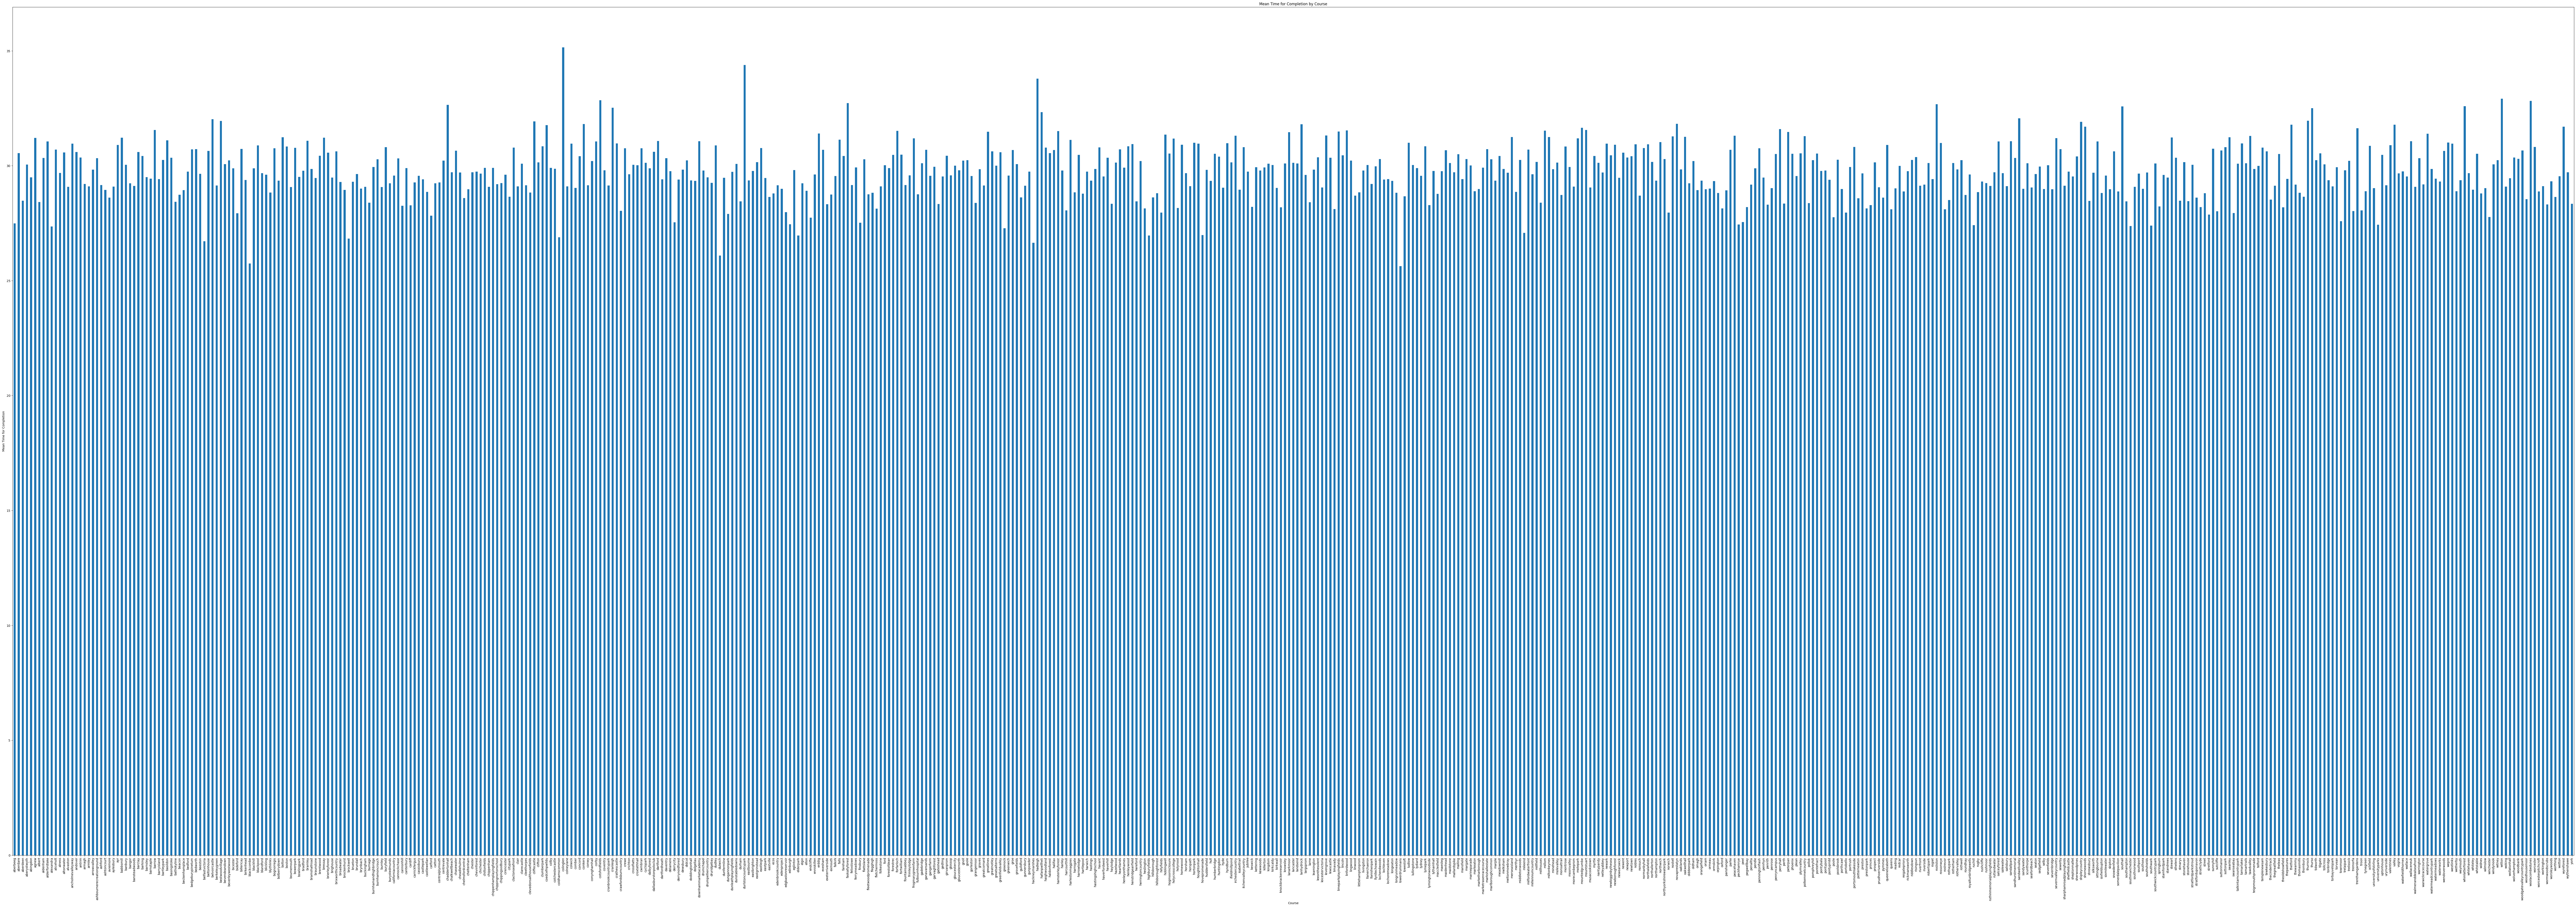

In [10]:
import matplotlib.pyplot as plt

mean_times.plot(kind='bar', figsize=(150, 50))
plt.xlabel('Course')
plt.ylabel('Mean Time for Completion')
plt.title('Mean Time for Completion by Course')
plt.xticks(rotation=90)
plt.show()

___


## Distribution of Means

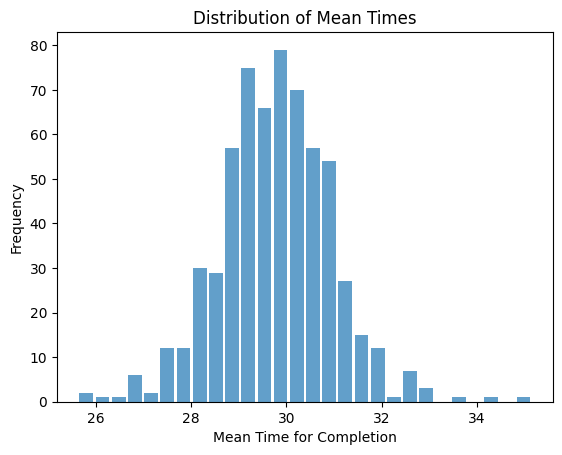

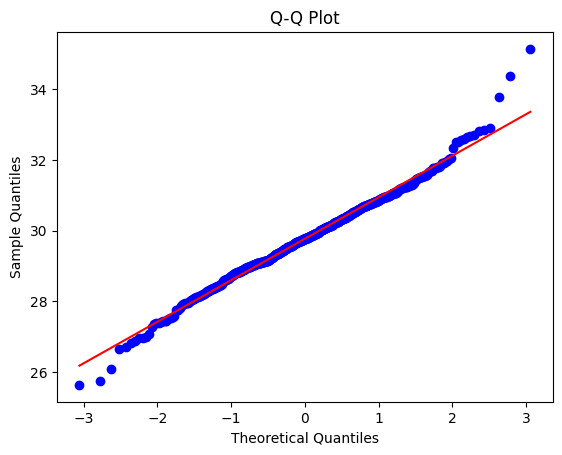

In [10]:
import scipy.stats as stats

# Assuming you have the mean_times Series

# Plotting histogram
plt.hist(mean_times, bins='auto', alpha=0.7, rwidth=0.85)
plt.xlabel('Mean Time for Completion')
plt.ylabel('Frequency')
plt.title('Distribution of Mean Times')
plt.show()

# Generating Q-Q plot
stats.probplot(mean_times, dist="norm", plot=plt)
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.title('Q-Q Plot')
plt.show()

Shapiro Wilks

In [12]:
from scipy.stats import shapiro

# Assuming you have the mean_times Series

# Performing Shapiro-Wilk test
stat, p_value = shapiro(mean_times)

# Checking the p-value
alpha = 0.05
if p_value > alpha:
    print("The mean times are normally distributed (fail to reject H0)")
else:
    print("The mean times are not normally distributed (reject H0)")

## This is interesting? Because it looks pretty normally distirbuted... ED! Check the tail/kurtosis, outliers etc.

The mean times are not normally distributed (reject H0)


# Correlation between numberica stuff and mean time

In [11]:
correlation_matrix = df.corr()
correlation_matrix

/var/folders/hs/621kvkf964qcltzl432lc5t00000gn/T/ipykernel_28429/868109210.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


,time,year,is_male,med_age,lat,lon
time,1.000000,NaN,-0.385322,0.181883,0.011667,0.012664
year,NaN,NaN,NaN,NaN,NaN,NaN
is_male,-0.385322,NaN,1.000000,0.044822,-0.008113,-0.002172
med_age,0.181883,NaN,0.044822,1.000000,0.009372,0.012140
lat,0.011667,NaN,-0.008113,0.009372,1.000000,0.791154
lon,0.012664,NaN,-0.002172,0.012140,0.791154,1.000000


# Analysis of Variance (ANOVA)

In [14]:
from scipy.stats import f_oneway

# Assuming you have a DataFrame called 'df' with columns 'Runner', 'Time', and 'Course'

# Performing one-way ANOVA
grouped_data = [df['time'][df['parkrun'] == course] for course in df['parkrun'].unique()]
f_value, p_value = f_oneway(*grouped_data)

# Checking the p-value
alpha = 0.05
if p_value < alpha:
    print("There are significant differences in mean completion times between courses (reject H0)")
else:
    print("There is no significant difference in mean completion times between courses (fail to reject H0)")

# The F-value is calculated as the ratio of two variances (between-groups variance and within-groups variance) and follows an F-distribution. 
# The F-distribution is always positive and skewed to the right.

# The F-value indicates the ratio of the explained variance (variance between the groups) to the unexplained variance (variance within the groups). 
# Higher F-values indicate larger differences among the group means, suggesting a higher likelihood of a significant difference.
print(f"f-value equals {f_value}")


There are significant differences in mean completion times between courses (reject H0)
f-value equals 176.51184725589866


# Push files to Repo

* In case you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
  # create here your folder
  # os.makedirs(name='')
except Exception as e:
  print(e)
